# 数据挖掘作业一

# 姓名：林宁 学号：3220190838

数据集: Oakland Crime Statistics 2011 to 2016

In [1]:
#导入必要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
from scipy import stats
from collections import Counter
from math import isnan

In [2]:
#读取数据集
path = "./dataset/oakland-crime-statistics-2011-to-2016/"
data_df = pd.read_csv(path+'records-for-2011.csv', index_col=0)

In [3]:
data_df.head() #数据集总览

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [4]:
data_df.dtypes  #每列数据类型

Create Time                   object
Location                      object
Area Id                      float64
Beat                          object
Priority                     float64
Incident Type Id              object
Incident Type Description     object
Event Number                  object
Closed Time                   object
dtype: object

In [5]:
data_df.shape  #数据集大小

(180016, 9)

# 3 数据分析要求

## 3.1 数据可视化和摘要

### 3.1.1 数据摘要

#### （1）标称属性，给出每个可能聚会的频数

该数据集存在'Create Time','Location','Beat','Incident Type Id','Incident Type Description','Event Number','Closed Time'七个标称属性

通过函数value_counts() 来统计出所有标称属性所有取值的数量

In [6]:
pd.value_counts(data_df['Create Time'])

2011-06-02T00:00:00.000    4
2011-09-21T14:05:59.000    3
2011-03-27T00:22:41.000    3
2011-04-24T20:39:53.000    2
2011-07-19T10:20:05.000    2
2011-09-03T07:02:01.000    2
2011-05-02T23:50:09.000    2
2011-08-24T18:56:09.000    2
2011-08-22T19:55:48.000    2
2011-11-01T23:08:35.000    2
2011-10-18T16:04:12.000    2
2011-07-14T13:18:34.000    2
2011-02-19T17:22:50.000    2
2011-06-27T13:52:59.000    2
2011-07-21T14:25:01.000    2
2011-08-06T05:53:08.000    2
2011-07-06T20:05:52.000    2
2011-03-16T18:42:57.000    2
2011-08-08T10:44:30.000    2
2011-06-27T11:22:38.000    2
2011-03-21T00:07:59.000    2
2011-08-25T14:06:56.000    2
2011-10-09T21:37:37.000    2
2011-02-19T10:35:37.000    2
2011-07-26T16:10:28.000    2
2011-06-03T17:29:26.000    2
2011-09-14T12:07:47.000    2
2011-04-26T11:15:35.000    2
2011-04-16T20:49:41.000    2
2011-02-22T13:22:35.000    2
                          ..
2011-08-24T10:22:35.000    1
2011-02-01T14:21:23.000    1
2011-03-25T19:45:31.000    1
2011-12-01T10:

In [7]:
pd.value_counts(data_df['Location'])

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
 TELEGRAPH AV              1584
 BANCROFT AV               1319
 SAN PABLO AV              1272
 FRUITVALE AV              1141
 7TH ST                    1093
 AV&MACARTHUR BLVD         1063
 ST&BROADWAY               1025
 HEGENBERGER RD            1024
 HARRISON ST                990
 HIGH ST                    987
 ST&TELEGRAPH AV            984
 73RD AV                    976
 MARKET ST                  840
 14TH ST                    824
 AV&FOOTHILL BLVD           761
 WEBSTER ST                 680
 W MACARTHUR BLVD           668
 AV&BANCROFT AV             667
 ST&MARTIN LUTHER KING      666
 ST&SAN PABLO AV            664
 E 18TH ST                  662
 MARTIN LUTHER KING         626
 E 12TH ST                  616
 ST&MARKET ST               614
 EDGEWATER DR               611
                           ... 
90TH LAK

In [8]:
pd.value_counts(data_df['Beat'])

04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64

In [9]:
pd.value_counts(data_df['Incident Type Id'])

933R      17348
911H      12817
SECCK     11393
415       10752
10851      7180
415C       6624
5150       5031
242        4636
912        4282
243E       4051
415GS      3939
949        3346
211        3148
HAZ        3068
602L       2791
WELCK      2513
11500      2509
245        2373
20002      2233
943        2081
901A       2075
647C       2064
415TH      1983
601R       1901
459        1883
CODE7      1874
975        1834
933SA      1824
415N       1603
23103      1602
          ...  
262           2
REDALT        2
290           2
SUSPS         2
10852         2
166_4         2
487E          2
300B          2
530           2
TARA          1
PGE           1
182           1
970A          1
10801         1
593           1
591           1
FLOOD         1
963           1
12020         1
243C          1
140           1
YELALT        1
MTHLAB        1
518           1
148           1
148_1         1
243B          1
666           1
346           1
LKOUT         1
Name: Incident Type Id, 

In [10]:
pd.value_counts(data_df['Incident Type Description'])

ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
DISTURBING THE PEACE     5843
MENTALLY ILL             5031
BATTERY                  4636
SUSPICIOUS PERSON        4282
BATTERY ON CO-HABITA     4051
415 GUNSHOTS             3939
415 FAMILY               3595
SUSPICIOUS VEHICLE       3346
ROBBERY                  3148
HAZARDOUS SITUATION/     3068
TRESPASS:                2791
WELFARE CHECK -- CHE     2513
DRUG DEALING             2509
ASSAULT W/DEADLY WEA     2373
HIT & RUN (PROPERTY      2233
FIGHT                    2081
VEHICLE COLLISION-PE     2075
OBSTRUCT PERSON'S MO     2064
415 THREATS              1983
RUNAWAY                  1901
BURGLARY                 1883
SUBJECT ARMED WITH W     1874
STAND BY AND PRESERV     1834
ALARM-SCHOOL ALARM       1824
DISTURBANCE-NEIGHBOR     1603
                        ...  
IDENTITY THEFT              2
CONTEMPT OF COURT/DI        2
REQUIRED T

In [11]:
pd.value_counts(data_df['Event Number'])

LOP110827000775    1
LOP110401000982    1
LOP110219000130    1
LOP110603001033    1
LOP110914000554    1
LOP110122000197    1
LOP110203000722    1
LOP110208000444    1
LOP111228000826    1
LOP110913000502    1
LOP110317000815    1
LOP110322000841    1
LOP110413000811    1
LOP110216000955    1
LOP110304000844    1
LOP110219000797    1
LOP110428000387    1
LOP110723000968    1
LOP110518000824    1
LOP110528000753    1
LOP110524001085    1
LOP110103000642    1
LOP110512000509    1
LOP110425000143    1
LOP111209000956    1
LOP110822000691    1
LOP110127000013    1
LOP110513000581    1
LOP111006000071    1
LOP110816000543    1
                  ..
LOP110620000535    1
LOP110317000260    1
LOP110304000676    1
LOP110625000213    1
LOP110828000736    1
LOP111127000334    1
LOP111114000125    1
LOP111111000708    1
LOP110406000727    1
LOP110109000151    1
LOP110726000359    1
LOP110106000114    1
LOP110830000062    1
LOP111218000491    1
LOP110105000311    1
LOP110409000526    1
LOP1108190004

In [12]:
pd.value_counts(data_df['Closed Time'])

2011-07-01T09:28:07.000    2
2011-06-09T08:20:35.000    2
2011-05-23T16:39:24.000    2
2011-11-29T11:26:14.000    2
2011-06-17T13:38:32.000    2
2011-11-12T23:55:46.000    2
2011-08-01T19:50:11.000    2
2011-02-15T18:49:43.000    2
2011-10-07T21:29:10.000    2
2011-11-24T09:15:33.000    2
2011-06-30T22:27:09.000    2
2011-05-23T23:41:26.000    2
2011-07-31T19:33:20.000    2
2011-03-15T14:13:55.000    2
2011-04-28T16:12:16.000    2
2011-09-04T14:13:02.000    2
2011-04-05T20:11:57.000    2
2011-07-11T12:42:47.000    2
2011-07-26T20:18:54.000    2
2011-09-09T21:25:04.000    2
2011-06-06T23:33:27.000    2
2011-08-17T07:36:07.000    2
2011-09-06T19:52:29.000    2
2011-06-17T22:46:34.000    2
2011-03-19T19:43:57.000    2
2011-07-29T23:24:37.000    2
2011-04-29T00:03:01.000    2
2011-02-12T11:25:48.000    2
2011-08-18T17:29:41.000    2
2011-02-26T22:55:49.000    2
                          ..
2011-04-07T21:06:08.000    1
2011-09-04T04:45:46.000    1
2011-06-11T06:20:24.000    1
2011-06-20T02:

#### （2） 数值属性，给出5数概括及缺失值的个数

In [13]:
pd.unique(data_df['Area Id']) #查看Area Id是否有缺失值

array([ 1.,  2.,  3., nan])

Area Id有缺失值

In [14]:
pd.unique(data_df['Priority']) #查看Priority是否有缺失值

array([ 1.,  2.,  0., nan])

Priority有缺失值

In [15]:
#查看Area Id缺失值个数
print("The NULL value num of 'Area Id' is:",data_df['Area Id'].isnull().sum()) 

The NULL value num of 'Area Id' is: 904


In [16]:
#查看Priority缺失值个数
print("The NULL value num of 'Priority' is:",data_df['Priority'].isnull().sum())

The NULL value num of 'Priority' is: 1


In [17]:
# Area Id,Priority的5数概括
number_data = ['Area Id','Priority']
data_df[number_data].describe()

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为904

price:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为1

### 3.1.2数据可视化(只针对数值型数据)

#### 绘制Area Id直方图、q-q图、盒图

E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


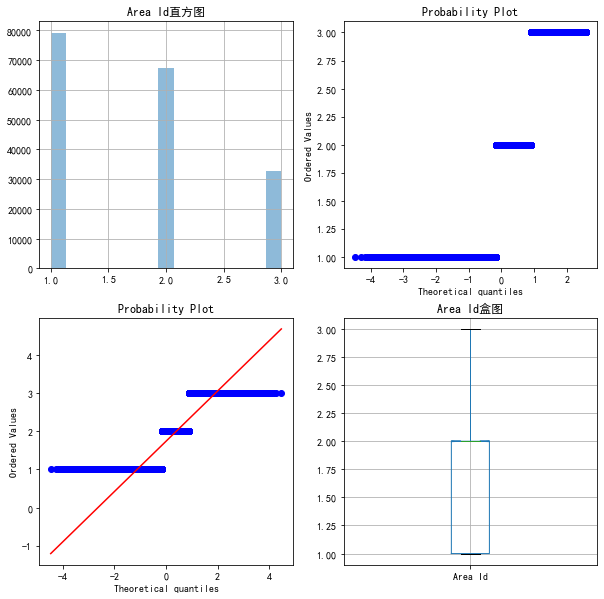

In [18]:
plt.figure(figsize=(10, 10))
#直方图绘制
plt.subplot(2,2,1)
plt.title("Area Id直方图")
data_df['Area Id'].hist(alpha=0.5,bins=15)

#q-q图绘制
plt.subplot(2,2,2)
stats.probplot(data_df['Area Id'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,3)
data=pd.DataFrame(data_df['Area Id'])
data = data.dropna()
stats.probplot(data['Area Id'], dist="norm", plot=plt)

#盒图
plt.subplot(2,2,4)
plt.title("Area Id盒图")
data_df['Area Id'].plot(kind='box', notch=True, grid=True)
plt.show()

#### 绘制Priority的直方图、q-q图、盒图

E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


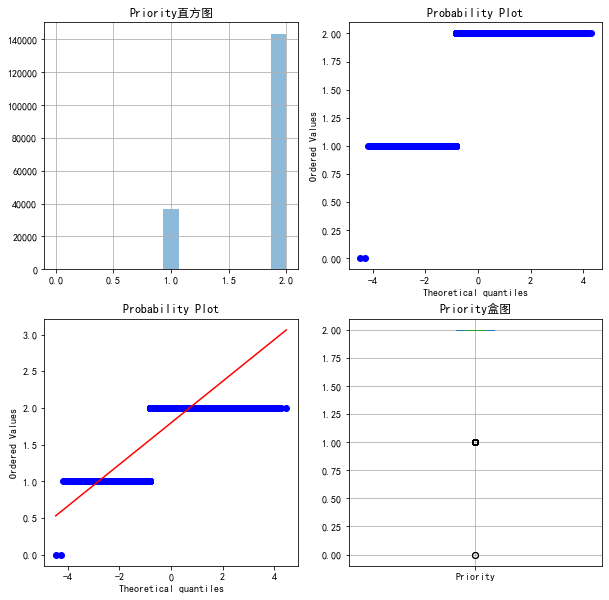

In [19]:
plt.figure(figsize=(10, 10))
#直方图绘制
plt.subplot(2,2,1)
plt.title("Priority直方图")
data_df['Priority'].hist(alpha=0.5,bins=15)

#qq图绘制
plt.subplot(2,2,2)
stats.probplot(data_df['Priority'],dist="norm",plot=plt)

#去除缺失值再绘制qq图
plt.subplot(2,2,3)
data=pd.DataFrame(data_df['Priority'])
data = data.dropna()
stats.probplot(data['Priority'], dist="norm", plot=plt)

#盒图
plt.subplot(2,2,4)
plt.title("Priority盒图")
data_df['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()

由直方图、q-q图、盒图可以得出：

Area Id属性、Priority属性分布均不符合正态分布。

## 3.2 数据缺失处理

In [20]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [21]:
missing_data(data_df)   #原始数据

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,1,0,904,520,1,1,1,1,7
Percent,0.000555506,0,0.502178,0.288863,0.000555506,0.000555506,0.000555506,0.000555506,0.00388854
Types,object,object,float64,object,float64,object,object,object,object


由上表可以看出，

数值型数据 Area Id 和 Priority存在缺失值

标称型数据 Create Time、Beat、Incident Type Id、Incident Type Description、Event Number、Closed Time

### 3.2.1 将缺失部分剔除

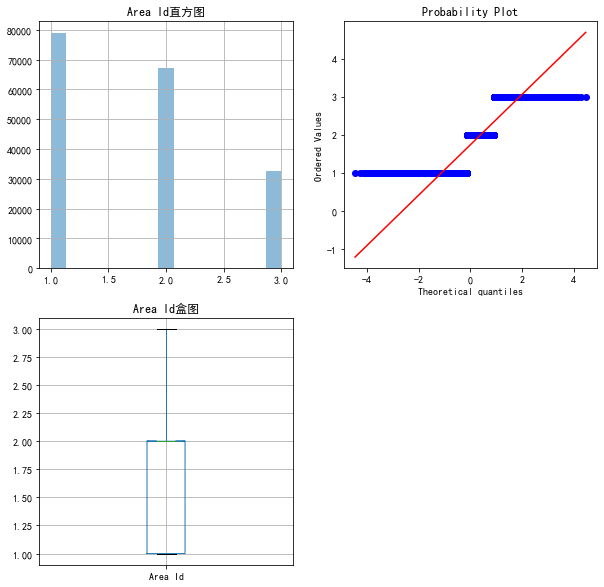

In [22]:
#将Area Id缺失部分剔除
del_df = data_df
del_df = del_df.dropna()

#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#Area Id直方图
plt.subplot(2,2,1)
plt.title("Area Id直方图")
del_df['Area Id'].hist(alpha=0.5,bins=15)

#Area Id q-q图
plt.subplot(2,2,2)
stats.probplot(del_df['Area Id'],dist="norm",plot=plt)

#Area Id 盒图
plt.subplot(2,2,3)
plt.title("Area Id盒图")
del_df['Area Id'].plot(kind='box', notch=True, grid=True)
plt.show()

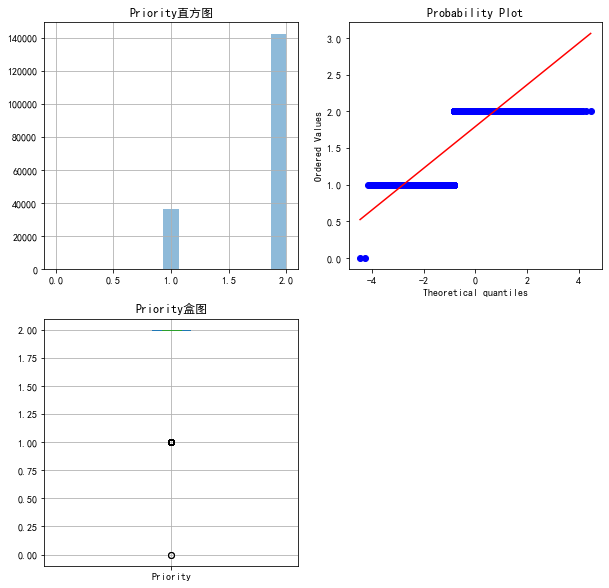

In [23]:
#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#Priority 直方图
plt.subplot(2,2,1)
plt.title("Priority直方图")
del_df['Priority'].hist(alpha=0.5,bins=15)

#Priority q-q图
plt.subplot(2,2,2)
stats.probplot(del_df['Priority'],dist="norm",plot=plt)

#Priority 盒图
plt.subplot(2,2,3)
plt.title("Priority盒图")
del_df['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()

In [24]:
missing_data(del_df)    #验证缺失部分剔除后数据是否有缺失值

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0
Types,object,object,float64,object,float64,object,object,object,object


由上表看出，缺失部分剔除后的数据没有缺失值

In [25]:
del_df[['Area Id','Priority']].describe() #缺失部分剔除后数据的5数概况

,Area Id,Priority
count,178771.000000,178771.000000
mean,1.740898,1.795252
std,0.746487,0.403546
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


缺失部分剔除后

price:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0

Priority:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为0

### 3.2.2 用最高频率值来填补缺失值

In [26]:
#用最高频率值来填补Area Id缺失值
fill_df = data_df
miss_features = ['Create Time','Area Id','Beat','Priority','Incident Type Id','Incident Type Description','Event Number','Closed Time']

for col in miss_features:
    word_counts = Counter(fill_df[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = fill_df[col].fillna(top)
    fill_df[col] = temp
fill_df.head()

2011-06-02T00:00:00.000 <class 'str'>
1.0 <class 'float'>
04X <class 'str'>
2.0 <class 'float'>
933R <class 'str'>
ALARM-RINGER <class 'str'>
LOP110101000001 <class 'str'>
2011-01-01T01:39:13.000 <class 'str'>


,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


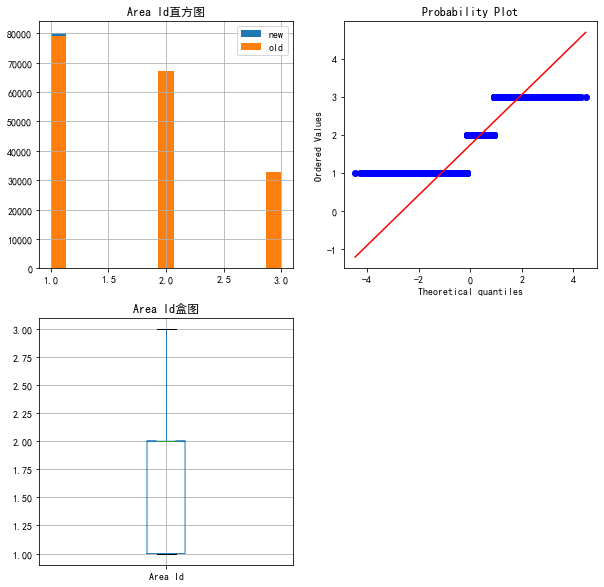

In [27]:
path = "./dataset/oakland-crime-statistics-2011-to-2016/"
data_df = pd.read_csv(path+'records-for-2011.csv', index_col=0)

#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#Area Id直方图
plt.subplot(2,2,1)
plt.title("Area Id直方图")
fill_df['Area Id'].hist(bins=15)
data_df['Area Id'].hist(bins=15)
plt.legend(['new','old'])

#Area Id q-q图绘制
plt.subplot(2,2,2)
stats.probplot(fill_df['Area Id'], dist="norm", plot=plt)

#Area Id 绘制盒图
plt.subplot(2,2,3)
plt.title("Area Id盒图")
fill_df['Area Id'].plot(kind='box', notch=True, grid=True)
plt.show()

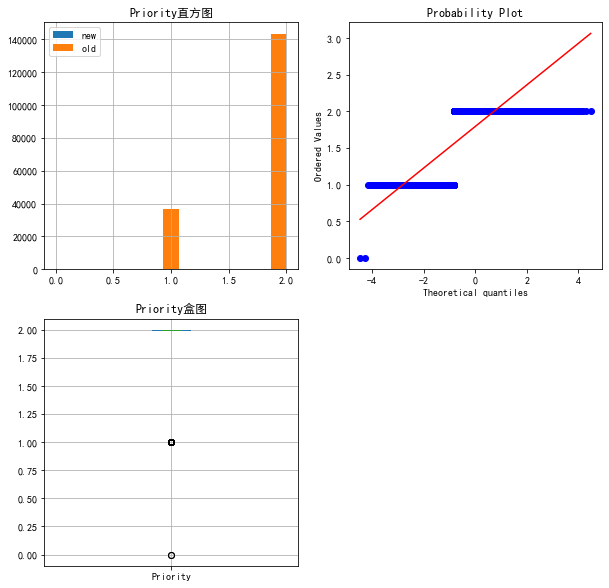

In [28]:
#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#Priority直方图
plt.subplot(2,2,1)
plt.title("Priority直方图")
fill_df['Priority'].hist(bins=15)
data_df['Priority'].hist(bins=15)
plt.legend(['new','old'])

#Priority q-q图绘制
plt.subplot(2,2,2)
stats.probplot(fill_df['Priority'], dist="norm", plot=plt)

#Priority盒图
plt.subplot(2,2,3)
plt.title("Priority盒图")
fill_df['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()

In [29]:
missing_data(fill_df) #验证缺失部分剔除后数据是否有缺失值

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0
Types,object,object,float64,object,float64,object,object,object,object


由上表看出，用高频数据填补后数据后的数据没有缺失值

In [30]:
fill_df[['Area Id','Priority']].describe()  #缺失部分剔除后数据的5数概况

,Area Id,Priority
count,180016.000000,180016.000000
mean,1.736929,1.796113
std,0.746430,0.402915
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


用高频数据填补后

price:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0

Priority:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为0

### 3.2.3 通过属性的相关关系来填补缺失值

In [31]:
data_df.corr()

,Area Id,Priority
Area Id,1.000000,-0.023366
Priority,-0.023366,1.000000


In [32]:
#通过属性的相关关系来填补Area Id缺失值
target_data = data_df['Area Id']
source_data = data_df['Priority']
flag1 = target_data.isnull().values
flag2 = source_data.isnull().values
complete_data = target_data.copy()
i=0
for _, value in target_data.iteritems():    
    if (flag1[i] == True)and(flag2[i] == False):
        complete_data[i] = 3 - source_data[i]
    i=i+1
values_clean = list(complete_data.dropna().values)

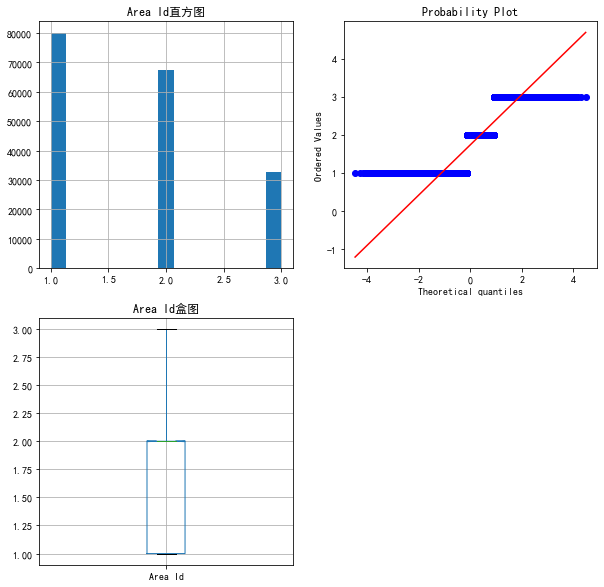

In [33]:
#绘制处理后数据的直方图、q-q图、盒图
fill_areaid2=pd.DataFrame(values_clean,columns=['Area Id'])
plt.figure(figsize=(10,10))
#Area Id 直方图
plt.subplot(2,2,1)
plt.title("Area Id直方图")
fill_areaid2['Area Id'].hist(bins=15)

#Area Id q-q图
plt.subplot(2,2,2)
stats.probplot(fill_areaid2['Area Id'], dist="norm", plot=plt)


#Area Id盒图
plt.subplot(2,2,3)
plt.title("Area Id盒图")
fill_areaid2['Area Id'].plot(kind='box', notch=True, grid=True)

plt.show()

In [34]:
#通过属性的相关关系来填补Priority缺失值
target_data2 = data_df['Priority']
source_data2 = data_df['Area Id']
flag12 = target_data2.isnull().values
flag22 = source_data2.isnull().values
complete_data2 = target_data2.copy()
i=0
for _, value in target_data2.iteritems():    
    if (flag12[i] == True)and(flag22[i] == False):
        complete_data2[i] = 2 - source_data2[i]
    i=i+1
values_clean2 = list(complete_data2.dropna().values)

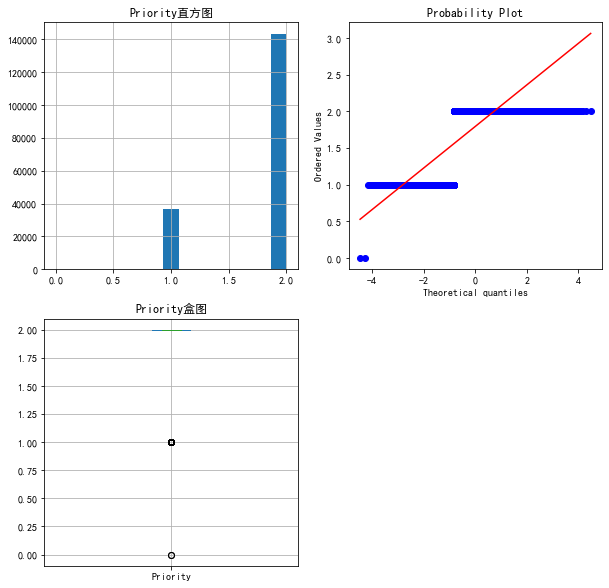

In [35]:
fill_priority2=pd.DataFrame(values_clean2,columns=['Priority'])
plt.figure(figsize=(10,10))
#Priority直方图
plt.subplot(2,2,1)
plt.title("Priority直方图")
fill_priority2['Priority'].hist(bins=15)

#Priority q-q图
plt.subplot(2,2,2)
stats.probplot(fill_priority2['Priority'], dist="norm", plot=plt)


#Priority 盒图
plt.subplot(2,2,3)
plt.title("Priority盒图")
fill_priority2['Priority'].plot(kind='box', notch=True, grid=True)

plt.show()

In [36]:
missing_data(fill_areaid2) #验证缺失部分剔除后数据是否有缺失值

,Area Id
Total,0
Percent,0
Types,float64


In [37]:
missing_data(fill_priority2) #验证缺失部分剔除后数据是否有缺失值

,Priority
Total,0
Percent,0
Types,float64


由上表看出，通过相关关系填补后数据后的数据没有缺失值

In [38]:
fill_areaid2.describe() #缺失部分剔除后数据的5数概况

,Area Id
count,180015.000000
mean,1.737089
std,0.746381
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [39]:
fill_priority2.describe() #缺失部分剔除后数据的5数概况

,Priority
count,180015.000000
mean,1.796111
std,0.402916
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


通过相关关系填补后

Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0

Priority:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为0

### 3.2.4 通过数据对象之间的相似性来填补缺失值

In [40]:
numeric_attr = ['Area Id','Priority']

#查找两个对象间的相似性
def find_dis_value(dataset, pos, column, numeric_attr):
    def dis_objs(tar_obj, sou_obj):
        dis_value = 0
        count = 0
        for column in tar_obj.index:
            if tar_obj[column] != np.NaN and sou_obj[column] != np.NaN:
                if column in numeric_attr:
                        values_sort = dataset[column].dropna().values.sort()
                        denominator = values_sort[-1] - values_sort[0]
                        dis_value += abs(tar_obj[column] - sou_obj[column])/denominator
                        count += 1

                elif tar_obj[column] == sou_obj[column]:
                    dis_value += 1
                count += 1
            else:
                continue
        return dis_value/count

    mindis = 9999
    result_pos = -1
    target_obj = dataset.ix[pos]
    for index in dataset.index:
        if index == pos:
            continue
        source_obj = dataset.ix(index)
        tmp = dis_objs(target_obj, source_obj)
        if tmp < mindis:
            result_pos = index
    return result_pos

# 通过数据对象之间的相似性来填补缺失值
data = data_df['Area Id'].copy()
for index, value in data.iteritems():
    if value == np.NaN:
        data[index] = data[find_dis_value(data_df, index, 'Area Id', numeric_attr)]


<function matplotlib.pyplot.show(*args, **kw)>

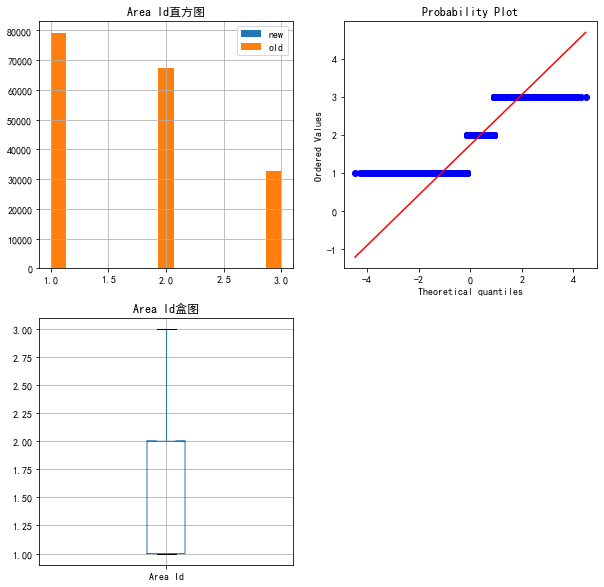

In [41]:
#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))

#Area Id直方图
plt.subplot(2,2,1)
plt.title("Area Id直方图")
data.hist(bins=15)
data_df['Area Id'].hist(bins=15)
plt.legend(['new','old'])

#Area Id q-q图
plt.subplot(2,2,2)
stats.probplot(data.dropna(), dist="norm", plot=plt)

#Area Id盒图
plt.subplot(2,2,3)
plt.title("Area Id盒图")
data.plot(kind='box', notch=True, grid=True)
plt.show

In [42]:
data.describe()

count    179112.000000
mean          1.740648
std           0.746468
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

通过相似性填补后

Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0